In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model 

In [43]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [50]:
df_OHstadia = patsy.dmatrix('match_stadium',data=df,return_type='dataframe')
df.join(df_OHstadia)

,hometeam_name,awayteam_name,home_goals,away_goals,match_date,match_timestamp,match_referee,match_stadium,match_attendance,home_possession,...,"match_stadium[T.Stamford Bridge, London]","match_stadium[T.The Hawthorns, West Bromwich]","match_stadium[T.The Valley, London]","match_stadium[T.Turf Moor, Burnley]","match_stadium[T.Vicarage Road, Watford]","match_stadium[T.Villa Park, Birmingham]","match_stadium[T.Vitality Stadium, Bournemouth]","match_stadium[T.Wembley Stadium, London]","match_stadium[T.White Hart Lane, London]","match_stadium[T.bet365 Stadium, Stoke]"
5567,Arsenal,Aston Villa,1,1,Sat 19 Aug 2006,1155996000000,Graham Poll,"Emirates Stadium, London",60023.0,72.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,Bolton Wanderers,Tottenham Hotspur,2,0,Sat 19 Aug 2006,1156004100000,Phil Dowd,"Macron Stadium, Bolton",22899.0,37.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,Everton,Watford,2,1,Sat 19 Aug 2006,1155996000000,Peter Walton,"Goodison Park, Liverpool",39691.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,Newcastle United,Wigan Athletic,2,1,Sat 19 Aug 2006,1155996000000,Martin Atkinson,"Sports Direct Arena, Newcastle",52227.0,55.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,Portsmouth,Blackburn Rovers,3,0,Sat 19 Aug 2006,1155996000000,Alan Wiley,"Fratton Park, Portsmouth",19502.0,44.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,Reading,Middlesbrough,3,2,Sat 19 Aug 2006,1155996000000,Mark Halsey,"Madejski Stadium, Reading",23802.0,52.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5573,Sheffield United,Liverpool,1,1,Sat 19 Aug 2006,1155987900000,Rob Styles,"Bramall Lane, Sheffield",31726.0,41.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5574,West Ham United,Charlton Athletic,3,1,Sat 19 Aug 2006,1155996000000,Howard Webb,"Boleyn Ground, London",34704.0,62.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5575,Chelsea,Manchester City,3,0,Sun 20 Aug 2006,1156086000000,Steve Bennett,"Stamford Bridge, London",41814.0,58.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5576,Manchester United,Fulham,5,1,Sun 20 Aug 2006,1156077000000,Andre Marriner,"Old Trafford, Manchester",75115.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
lsm = smf.ols('attendance_delta ~ match_stadium*(home_prior_leaguerank + away_prior_leaguerank + matchweek)',
              data = df)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       attendance_delta   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.320
Date:                Mon, 16 Jul 2018   Prob (F-statistic):           3.46e-18
Time:                        17:29:00   Log-Likelihood:                -34174.
No. Observations:                3768   AIC:                         6.868e+04
Df Residuals:                    3600   BIC:                         6.973e+04
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                  -154.9304   3929.599     -0.039      0.969   -7859.392    7549.532
match_stadium[T.Anfield, Liverpool]                                         297.8090   3979.481      0.075      0.940   -7504.454    8100.072
match_stadium[T.Bloomfield Road, Blackpool]                                 850.9547   4551.630      0.187      0.852   -8073.077    9774.986
match_stadium[T.Boleyn Ground, London]                                      299.9484   3991.769      0.075      0.940   -7526.407    8126.304
match_stadium[T.Bramall Lane, Sheffield]                                    1.51e+04    1.3e+04      1.164      0.245   -1.03e+04    4.05e+04
match_stadium[T.Britannia Stadium, Stoke]                                  4.605e-10    5.9e-10      0.780      0.435   -6.97e-10    1.62e-09
match_stadium[T.Cardiff City Stadium, Cardiff]                             2261.9196   6175.866      0.366      0.714   -9846.627    1.44e+04
match_stadium[T.Carrow Road, Norwich]                                       490.0515   4163.430      0.118      0.906   -7672.865    8652.969
match_stadium[T.Craven Cottage, London]                                    1882.4255   4047.166      0.465      0.642   -6052.542    9817.393
match_stadium[T.DW Stadium, Wigan]                                          276.3107   4071.143      0.068      0.946   -7705.666    8258.287
match_stadium[T.Emirates Stadium, London]                                   218.6651   3971.977      0.055      0.956   -7568.886    8006.216
match_stadium[T.Etihad Stadium, Manchester]                                 367.8561   3959.037      0.093      0.926   -7394.323    8130.036
match_stadium[T.Ewood Park, Blackburn]                                     1441.9176   4161.361      0.347      0.729   -6716.943    9600.779
match_stadium[T.Fratton Park, Portsmouth]                                   917.7061   4087.778      0.224      0.822   -7096.887    8932.299
match_stadium[T.Goldsands Stadium, Bournemouth]                             442.6728   6862.164      0.065      0.949    -1.3e+04    1.39e+04
match_stadium[T.Goodison Park, Liverpool]                                   505.0376   3984.893      0.127      0.899   -7307.836    8317.912
match_stadium[T.John Smith's Stadium, Huddersfield]                          25.2969   4351.461      0.006      0.995   -8506.278    8556.872
match_stadium[T.KCOM Stadium, Hull]                                         729.0066   4076.857      0.179      0.858   -7264.174    8722.187
match_stadium[T.King Power Stadium, Leicester]                              207.6004   4027.678      

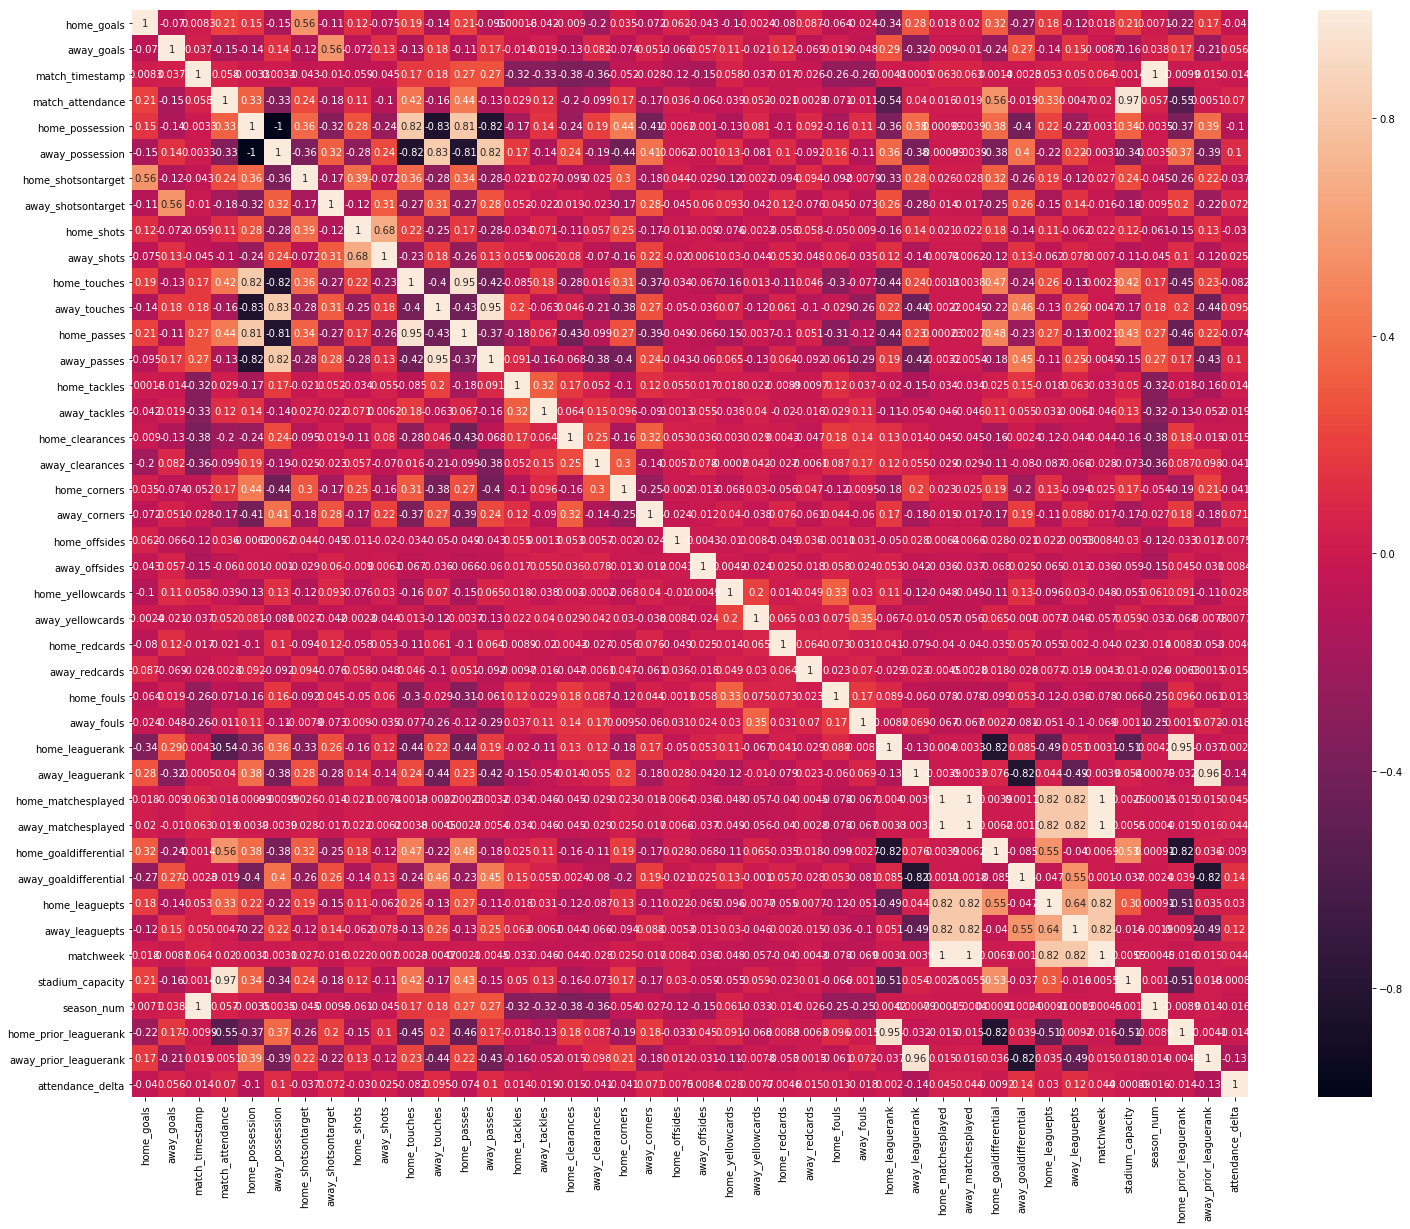

In [63]:
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True)

In [7]:
df.corr()['attendance_delta'].sort_values()

target                  -0.272832
away_leaguerank         -0.138880
away_prior_leaguerank   -0.128479
home_possession         -0.104174
home_touches            -0.082248
home_passes             -0.074197
away_clearances         -0.041299
home_corners            -0.041254
home_goals              -0.039914
home_shotsontarget      -0.036944
home_shots              -0.029650
away_tackles            -0.019288
away_fouls              -0.018305
season_num              -0.016461
home_clearances         -0.014858
match_timestamp         -0.013806
home_prior_leaguerank   -0.013640
home_goaldifferential   -0.009150
home_redcards           -0.004604
stadium_capacity        -0.000893
home_leaguerank          0.001969
home_offsides            0.007545
away_yellowcards         0.007742
away_offsides            0.008417
home_fouls               0.013441
home_tackles             0.013827
away_redcards            0.015264
away_shots               0.025242
home_yellowcards         0.028411
home_leaguepts

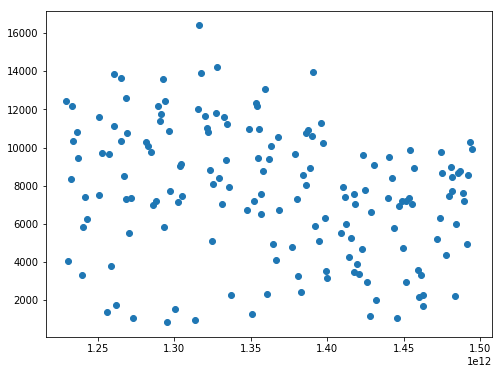

In [17]:
plt.figure(figsize=[8,6])
df2 = df[df['hometeam_name'] == 'Sunderland']
plt.scatter(df2['match_timestamp'], df2['target'])